In [54]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numba

# Assignment3

In [91]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import numba




@numba.njit
def velocity_krasny(circulation, self_position, other_position, delta):
    z_relative = (self_position - other_position)
    x = z_relative.real
    y = z_relative.imag
    velocity = complex(-y,x)*circulation/(2*np.pi*(x*x+y*y+delta*delta))
    return velocity


@numba.njit
def total_velocity_krasny(gamma, all_positions,v,delta): 
    for i in range(len(gamma)):
        for j in range(len(gamma)):
            if i !=j :
                v[i] += velocity_krasny(gamma[j],all_positions[i],all_positions[j],delta)
    return v


def euler_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    v=np.zeros(len(gamma),dtype=complex)
    velocity = total_velocity_krasny(gamma, all_positions,v,delta)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + velocity[i]*dt
    return new_positions


def RK2_krasny(gamma, all_positions, dt, delta):
    new_positions = np.zeros(shape=(len(gamma)),dtype=complex)
    v=np.zeros(len(gamma),dtype=complex)
    vi = total_velocity_krasny(gamma, all_positions,v,delta)
    temp_positions = euler_krasny(gamma, all_positions, dt,delta)
    vi1 = total_velocity_krasny(gamma, temp_positions,v,delta)
    for i in range(len(gamma)):
        new_positions[i] = all_positions[i] + (vi[i]+vi1[i])*dt/2
    return new_positions


def integrate_krasny(gamma, all_positions, n, dt, method, delta):
    
    data = []
    data.append(all_positions)
    temp_positions = all_positions
    if method == 1 :
        for i in range(1,n,1):
            new_positions = RK2_krasny(gamma,temp_positions, dt,delta)
             #print(new_positions)
            data.append(new_positions)
            temp_positions = new_positions

    elif method == 2 :
        for i in range(1,n,1):
            new_positions = euler_krasny(gamma,temp_positions, dt, delta)
            #print(new_positions)
            data.append(new_positions)
            #for q in range(len(gamma)):
                #data[q][i]=new_positions[q]
            temp_positions = new_positions
    return data        
    
def gamma(n):                                                #function for n gammas initialization
    gamma = np.ones(n)
    return gamma
def total_vortices(j,m):                                     #total number of vortices in one circular 
    n = j*(j+1)*m/2 + 1
    return int(n)

def vortices_position(center1, center2, j, m, d):          #position of all vortices variables are same as paper cited
    n = total_vortices(j,m)                                #j=rings of radii, j*m(where j=1,J) are total vortices 
    all_positions = np.zeros(shape=2*n,dtype=complex)      #in each radii, d is difference between two radii 
    all_positions[0]  = center1
    counter=1
    for p in range(1,j+1):
        r=p*d                                               #r=j*d(radii at jth ring)
        s=p*m                                               #s=j*m(total vortices in jth ring)
        for q in range(1,s+1):
            theta = q*2*(np.pi)/s                           #different angle for all point vortices
            x=center1.real + r*math.cos(theta)
            y=center1.imag + r*math.sin(theta)
            all_positions[counter]=complex(x,y)
            counter += 1
    all_positions[counter]=center2
    counter += 1
    for p in range(1,j+1):
        r=p*d
        s=p*m
        for q in range(1,s+1):
            theta = q*2*(np.pi)/s
            x=center2.real + r*math.cos(theta)
            y=center2.imag + r*math.sin(theta)
            all_positions[counter]=complex(x,y)
            counter += 1        
    return all_positions                                    #all_positions are array containing position of all
                                                            #vortices in both circular region(0:n 1st and n:2n second)
                                                            #1:n index of circle1, n:2n+1 index of circle2
        
#below function take center1, center2 , j(no of rings), m(points in one ring=j*m), steps(no. of running steps)
#dt , method(1=RK2, 2=Euler), delf(delta factor)  return data(rows=time step, columns=no of vortices)
def problem_circular_vortex(center1,center2, j, m, d, steps, dt, method, delf=3):
    n = total_vortices(j,m)
    delta = delf*d
    z = vortices_position(center1, center2, j, m, d)
    gamma_all = gamma(2*n)
    
    data = integrate_krasny(gamma_all, z, steps, dt, method, delta)
    return data, n


In [105]:
data_trial, n  = problem_circular_vortex(complex(-6,0),complex(6,0),10,10,0.1,1000,0.001,1,4)

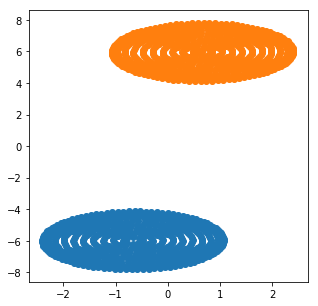

In [129]:
plt.figure(figsize=(5,5))
k=600                         #time step where we want position
plt.scatter(data_trial[k][1:n].real,data_trial[k][1:n].imag)
plt.scatter(data_trial[k][n:2*n].real,data_trial[k][n:2*n].imag)


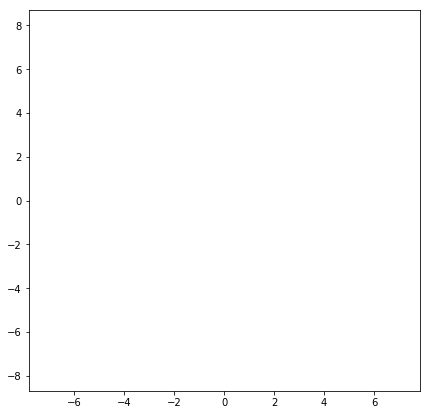

In [107]:
import matplotlib
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)
for i in range(1000):
    plt.plot(data_trial[i][1:n].real,data_trial[i][1:n].imag,'b.')
    plt.plot(data_trial[i][n:2*n].real,data_trial[i][n:2*n].imag, 'r.')
    camera.snap()
animation = camera.animate()
animation.save('abc13.mp4')                                    #for animation